<a href="https://colab.research.google.com/github/panda-yoo/ML_practice_code/blob/ML_practice_code/march_2025/file1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import torch as th


In [75]:
class SimpleNN(th.nn.Module):
    def __init__(self,n_neurons):
        super().__init__()
        self.net = th.nn.Sequential(
            th.nn.Linear(1,n_neurons),
            th.nn.ReLU(),
            th.nn.Linear(n_neurons,1),
      )


    def forward(self,X):
      return self.net(X)



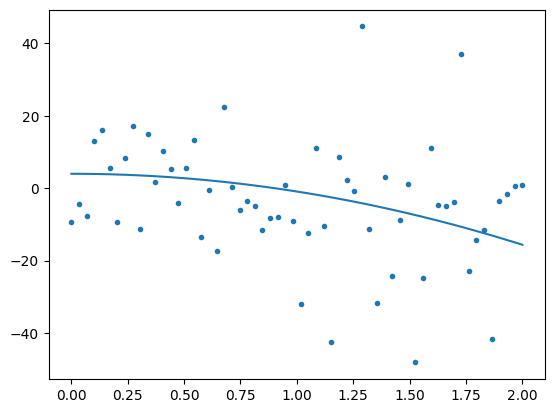

In [92]:
def eq_of_projectile(h0,t,u):
    g = 9.8
    return h0 + u*t - 0.5 * g * t**2


t = np.linspace(0, 2, 60)
h0,u = 4,0
noise_para1 = 4 * np.random.randint(low=2,high=5)
noise_para2 = 7 * np.random.randint(low=2,high=5)


y = eq_of_projectile(h0,t,u)
l1 = len(y)//2
l2 = len(y) - l1


d1 =  y[:l1] + noise_para1 * np.random.randn(l1)
d2 =  y[l1:] + noise_para2 * np.random.randn(l2)

y_data = np.append(d1,d2,axis=0)

# y_data = y + noise_para * np.random.standard_cauchy(len(t))


#np.save('y_data.npy',y_data)

plt.plot(t,y)
plt.scatter(t, y_data, marker=".")

In [5]:
#y_data = np.load('y_data.npy')

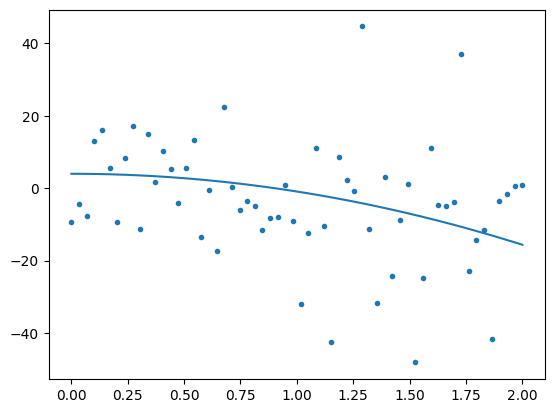

In [93]:
plt.plot(t,y)
plt.scatter(t, y_data, marker=".")

In [94]:
th_t = th.tensor(t,dtype=th.float32,requires_grad=True).view(-1,1)
th_y_true = th.tensor(y,dtype=th.float32).view(-1,1)
th_y_data = th.tensor(y_data,dtype=th.float32).view(-1,1)

In [97]:
model = SimpleNN(n_neurons=16)
opt = th.optim.Adam(params=model.parameters())
loss_obj = th.nn.MSELoss()

epochs = 300

model.train()

for epoch in range(epochs):
    opt.zero_grad()

    y_pred = model.forward(X=th_t)

    loss = loss_obj(y_pred,th_y_true)

    #loss = th.autograd.Variable(loss,requires_grad=True)
    loss.backward()
    # print(y_pred)
    # break
    opt.step()

    if epoch % 100 == 0:
      print(f'loss {loss}')



loss 44.050106048583984
loss 36.85411071777344
loss 30.161174774169922


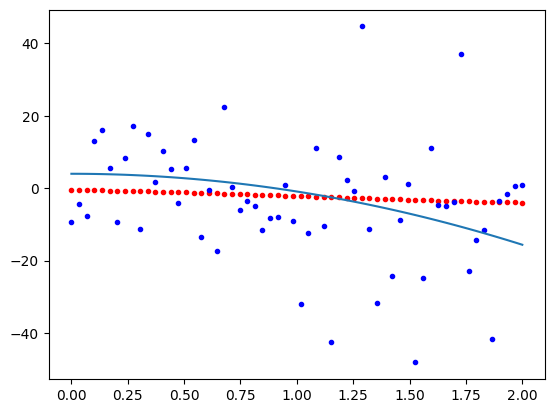

In [98]:
plt.scatter(t,model(th_t).detach(),marker='.',c='r') # prediction
plt.scatter(t,y_data,marker='.',c='b')
#plt.plot(t,y_data,c='b')
plt.plot(t,y)